# Plotting Uncertainties

In this notebook we will plot uncertainties together with the actual measured data points when conducting experiments. 

We'll be using the first year experiment "Fusing current of wire conductors" as an example. Recall the experiment introduction.

### Experiment description

The aim of the experiment is to investigate the relationship between the fusing current and the diameter for wire conductors. In 1884, William Henry Preece derived a fundamental law of fusing by considering the balance of heat generation ($I^2R$) with the heat loss ($\pi hdl$), which is approximately valid near the fusing threshold. Here it is assumed that the wire current is constant. The symbols used represent the following: $I$ for the wire current, $R$ for the wire resistance, $\sigma$ is the wire electrical conudctivity, $h$ is heat load per unit area from radiation or convection, $d$ is for the wire diameter, and $l$ is the wire length. Thus

$$ I^2_fR=I2_f\frac{4l}{\sigma \pi d^2} = \pi hdl $$
or
$$ I_f = BD^{3/2}\;\text{and}\; B=\frac{1}{2}\pi\sqrt{\sigma h}$$

where $I_f$ denotes the fusing current. Preece's law states that the wire fusing current is proportional to the wire diameter to the three halves power. Note that this effect is independent of length (however for practical purposes the length of the wire should be just loose due to internal resistance).

For the purpose of this notebook, the experiment readings have already been performed and we need to perform the required data analysis. The resulting measurements are stored in [this excel file](data/fusing_current_data.xlsx). 

### Data Analysis

The relation between the fusion current $I_F$ and the diameter $d$ of the wire can be written in the form

$$ I_F = kd^a $$.

where $a$ is a constant that according to theoretical calculations is equal to 3/2. Use logarithms to set the above equation in a straight line format. Hence, plot a suitable graph to determine the value of $a$ that can be obtained from measurements. Inculde error bars for the measurements in your plot. 

We can load the data using pandas:

In [1]:
import pandas as pd

In [2]:
# Read excel file using pandas
data = pd.read_excel('data/fusing_current_data.xlsx', 0)

# Display data
data

,I1/A,d1/mm,d2/mm,I2/A,d3/mm,d4/mm,I3/A,d5/mm,d6/mm
0,4,0.15,0.15,3.5,0.14,0.14,4.0,0.15,0.15
1,8,0.24,0.24,7.0,0.25,0.25,7.5,0.25,0.25
2,13,0.29,0.29,13.0,0.28,0.28,12.5,0.27,0.27
3,13,0.31,0.31,13.5,0.31,0.31,13.0,0.31,0.31
4,15,0.34,0.34,15.0,0.33,0.33,14.5,0.34,0.34


As we can see, the data in the excel file consists of multiple rows which show the readings for a specific current. For each row there were multiple measurements of the current and wire diameter. 

First we should find the average current and diameter for each row:

In [3]:
import numpy as np

# Calculate average current for each row
average_I = data['I1/A'] + data['I2/A'] + data['I3/A']
average_I /= 3

# Calculate average diameter for each row
average_d = data['d1/mm'] + data['d2/mm'] + data['d3/mm'] + data['d4/mm'] + data['d5/mm'] + data['d6/mm']
average_d /= 6

To include the error bars we need to calculate $\Delta I$ and $\Delta d$:

In [4]:
standard_deviation = np.std([data['I1/A'], data['I2/A'], data['I3/A']], axis=0, ddof=1)
delta_I = 3.182 * standard_deviation / np.sqrt(3)

standard_deviation = np.std([data['d1/mm'], data['d2/mm'], data['d3/mm'], data['d4/mm'], data['d5/mm'], data['d6/mm']], axis=0, ddof=1)
delta_d = 2.447 * standard_deviation / np.sqrt(6)

Now that we have the value and their deltas, we need to take the natural logarithm to convert this to a straight line.

In [5]:
delta_I /= average_I
delta_d /= average_d

# Compute the logs of array which do not have invalid values 
average_I = np.log(average_I)
average_d = np.log(average_d)

We can plot these points and their errors using matplotlib's `errorbar` plotting function.

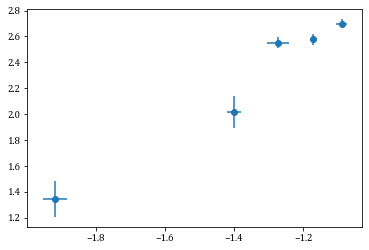

In [9]:
import matplotlib.pyplot as plt

# Enable inline plotting
%matplotlib inline

plt.errorbar(average_d, average_I, xerr=delta_d, yerr=delta_I, fmt='o')
plt.show()

We have displayed the points. Now we need to fit a line:

In [10]:
# Calculate the polynomical coefficients (last parameters is the number of coefficients)
coeffs = np.polyfit(average_d, average_I, 1)

# Generate the polynomial function, which when called will take a list of x-values
# and will return the respective y values
poly_function = np.poly1d(coeffs)

# Generate trendline
trendline = poly_function(average_d)

Generate the final plot showing data points with error bars and the trendline

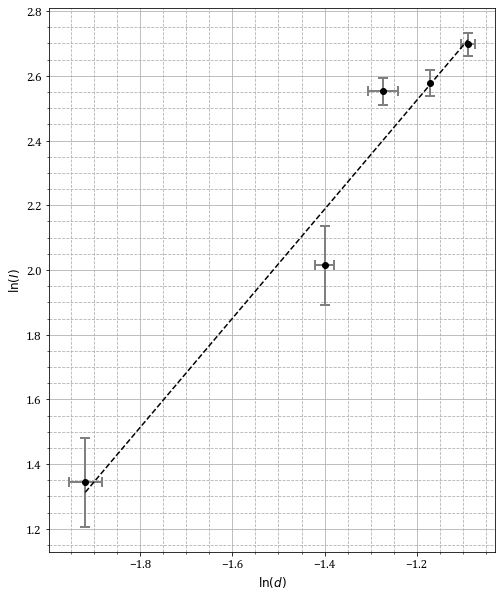

In [11]:
import matplotlib.pyplot as plt

# Set the font to Cambria and size 12
plt.rcParams["font.family"] = "Cambria"
plt.rcParams["font.size"] = 12
plt.rcParams["font.weight"] = "normal"

# Create figure and set size
f = plt.figure(figsize=(8, 10))

# Show the data
plt.errorbar(average_d, average_I, xerr=delta_d, yerr=delta_I, 
             fmt='o', color='k', elinewidth=2, capsize=5, 
             capthick=2, ecolor='gray')

# Show the trendline
plt.plot(average_d, trendline, 'k--')

# Enable minor ticks so that we can show a fine grid
plt.minorticks_on()
plt.grid(b=True, which='major', linestyle='-')
plt.grid(b=True, which='minor', linestyle='--')

# Display labels
plt.xlabel(r"$\ln(d)$")
plt.ylabel(r"$\ln(I)$")

plt.show()

***

The following files contain experiment data for some of the first years experiments you preformed last year. You can practice producing error bars through them:
* [Resistor IV](data/resistor_data.xlsx)
* [Calibration of thermocouples](data/thermocopule.xlsx)
* [Poiseuille's formula](data/poiseuille_data.xlsx)

Additionally, you can also try this out by plotting [CMB data generated by the BICEP2 telescope](data/cmb_bicep2_data.xlsx)